# Imports

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## Clear and dataset

In [162]:
PATH_P_V_V = "./P_vs_V.xlsx"
PATH_P_V_T = "./P_vs_T.xlsx"

df_pvv_comp, df_pvv_exp = pd.read_excel(PATH_P_V_V, sheet_name=None).values()
df_pvt_hot, df_pvt_cold = pd.read_excel(PATH_P_V_T, sheet_name=None).values()

dfs = [df_pvt_hot, df_pvt_cold, df_pvv_comp, df_pvv_exp]
dfs_pvv = [df_pvv_comp, df_pvv_exp]
dfs_pvt = [df_pvt_hot, df_pvt_cold]

for df in dfs:
    df.rename(columns={
        'Hora': 'Time',
        'Presión': 'Preassure',
        'Temperatura': 'Temperature',
        'Volumen': 'Volume'
    }, inplace=True)
    df['Time'] = df['Time'] - df['Time'].iloc[0]
    df['Time'] = df['Time'].dt.total_seconds()
    max_time = df['Time'].max()
    df['Time_n'] = df['Time'] / max_time if max_time != 0 else 0
    
    df['Preassure'] = df['Preassure'] * 100000
    df['Temperature'] = df['Temperature'] + 273.15

## The basic Graphs

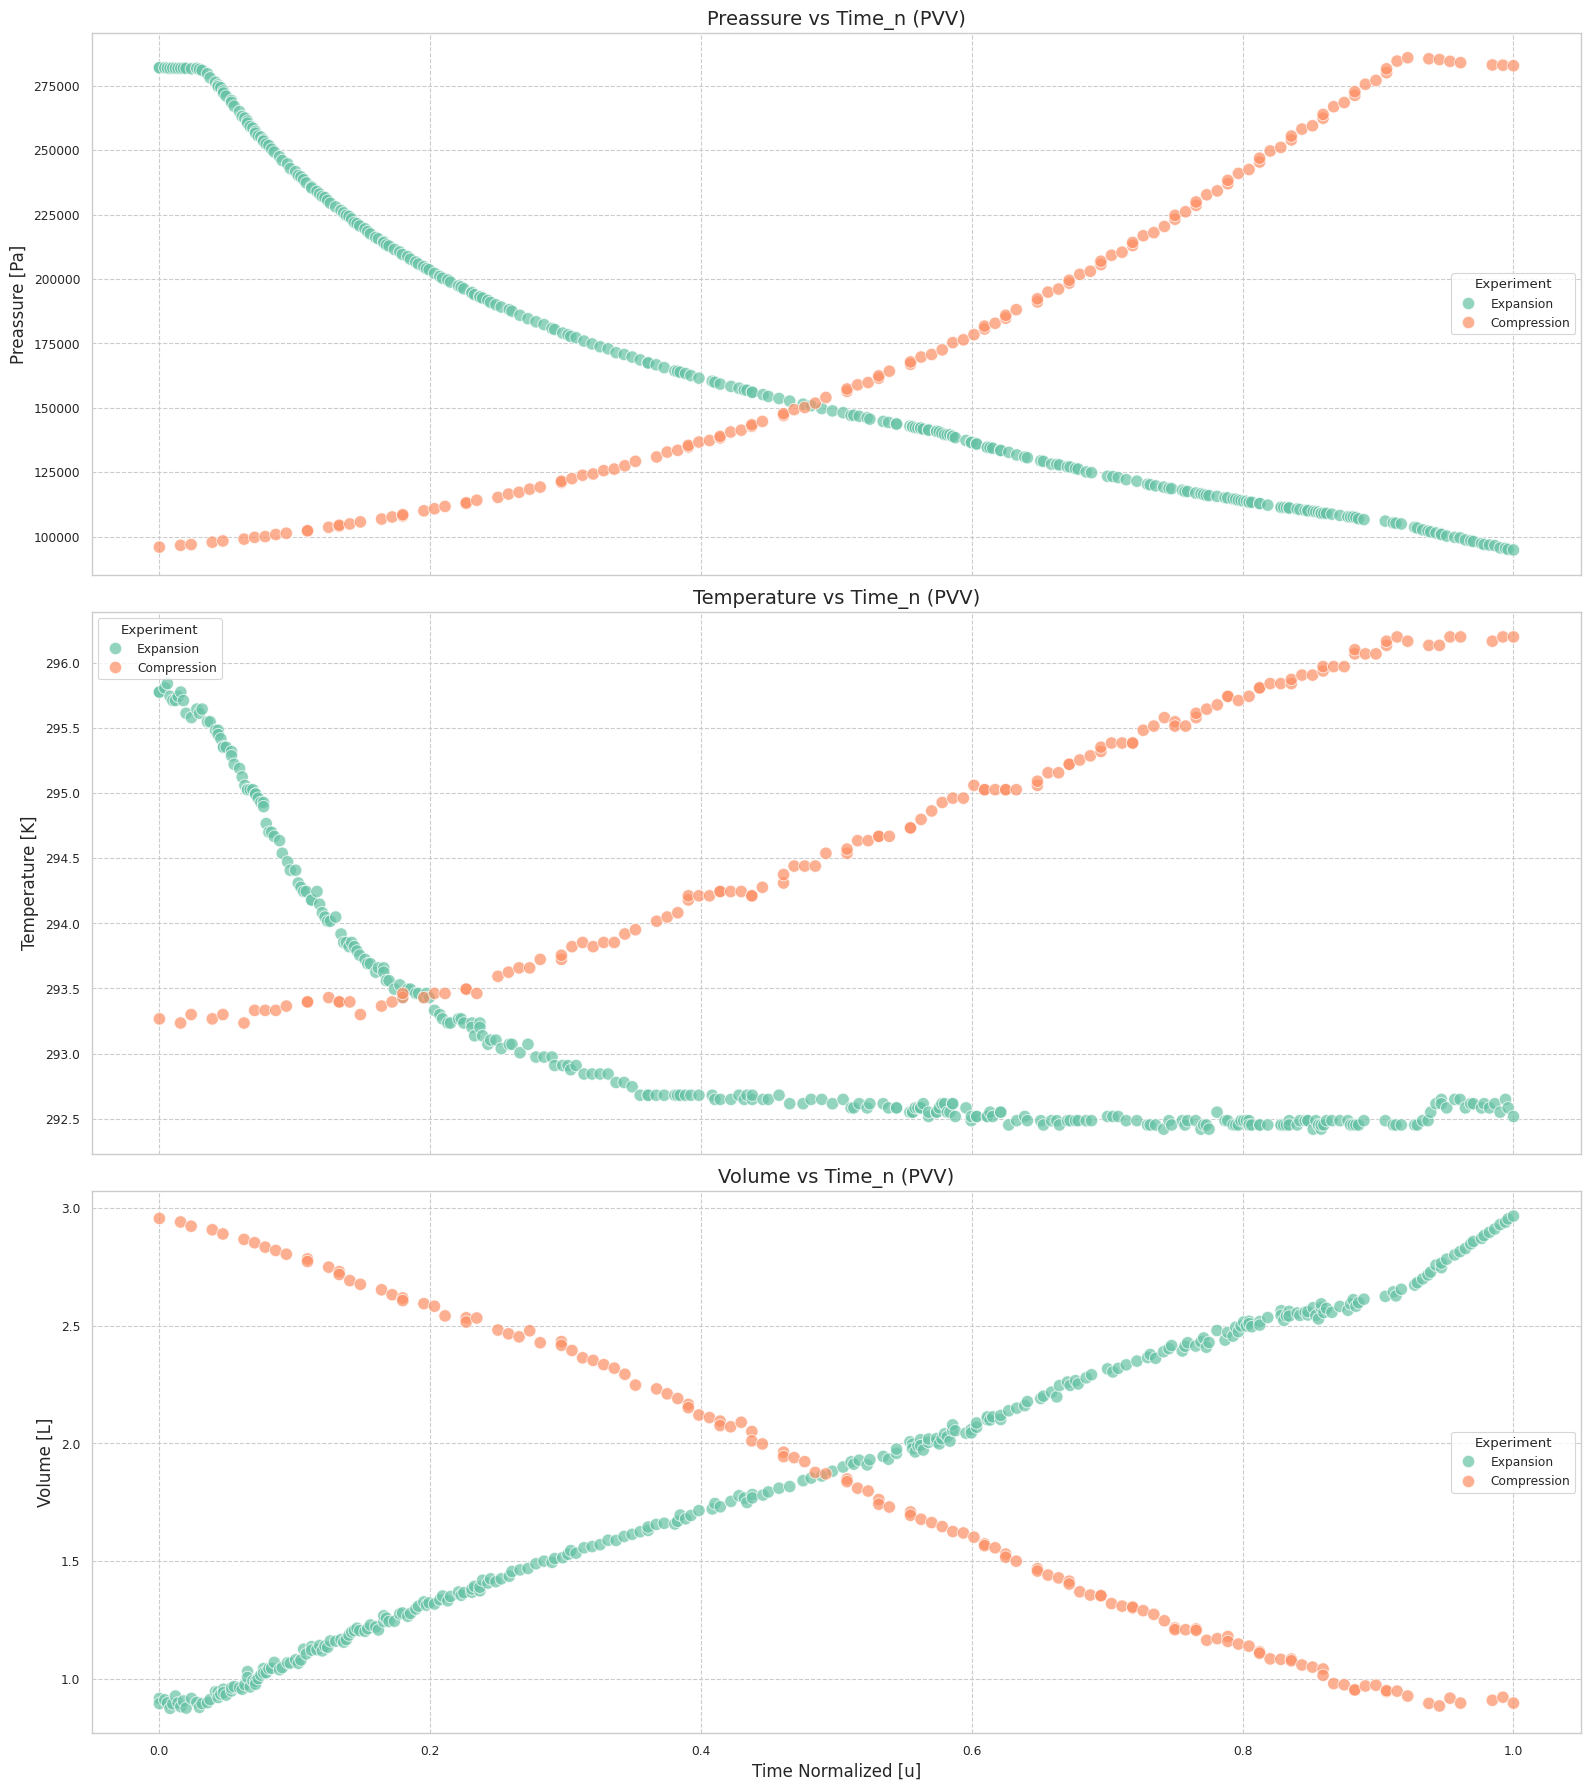

In [163]:
fig, axes = plt.subplots(3, 1, figsize=(16, 18), sharex=True)
sns.set_style("whitegrid")
sns.set_context("paper")

# Pressure vs Time_n
sns.scatterplot(
    x='Time_n',
    y='Preassure',
    data=pd.concat([
        df_pvv_exp.assign(Type='Expansion'),
        df_pvv_comp.assign(Type='Compression')
    ]),
    ax=axes[0],
    hue='Type',
    palette='Set2',
    alpha=0.7,
    s=80
)
axes[0].set_ylabel('Preassure [Pa]', fontsize=12)
axes[0].set_title('Preassure vs Time_n (PVV)', fontsize=14)
axes[0].legend(title='Experiment')
axes[0].grid(True, linestyle='--')

# Temperature vs Time_n
sns.scatterplot(
    x='Time_n',
    y='Temperature',
    data=pd.concat([
        df_pvv_exp.assign(Type='Expansion'),
        df_pvv_comp.assign(Type='Compression')
    ]),
    ax=axes[1],
    hue='Type',
    palette='Set2',
    alpha=0.7,
    s=80
)
axes[1].set_ylabel('Temperature [K]', fontsize=12)
axes[1].set_title('Temperature vs Time_n (PVV)', fontsize=14)
axes[1].legend(title='Experiment')
axes[1].grid(True, linestyle='--')

# Volume vs Time_n
sns.scatterplot(
    x='Time_n',
    y='Volume',
    data=pd.concat([
        df_pvv_exp.assign(Type='Expansion'),
        df_pvv_comp.assign(Type='Compression')
    ]),
    ax=axes[2],
    hue='Type',
    palette='Set2',
    alpha=0.7,
    s=80
)
axes[2].set_xlabel('Time Normalized [u]', fontsize=12)
axes[2].set_ylabel('Volume [L]', fontsize=12)
axes[2].set_title('Volume vs Time_n (PVV)', fontsize=14)
axes[2].legend(title='Experiment')
axes[2].grid(True, linestyle='--')

plt.tight_layout()
plt.show()


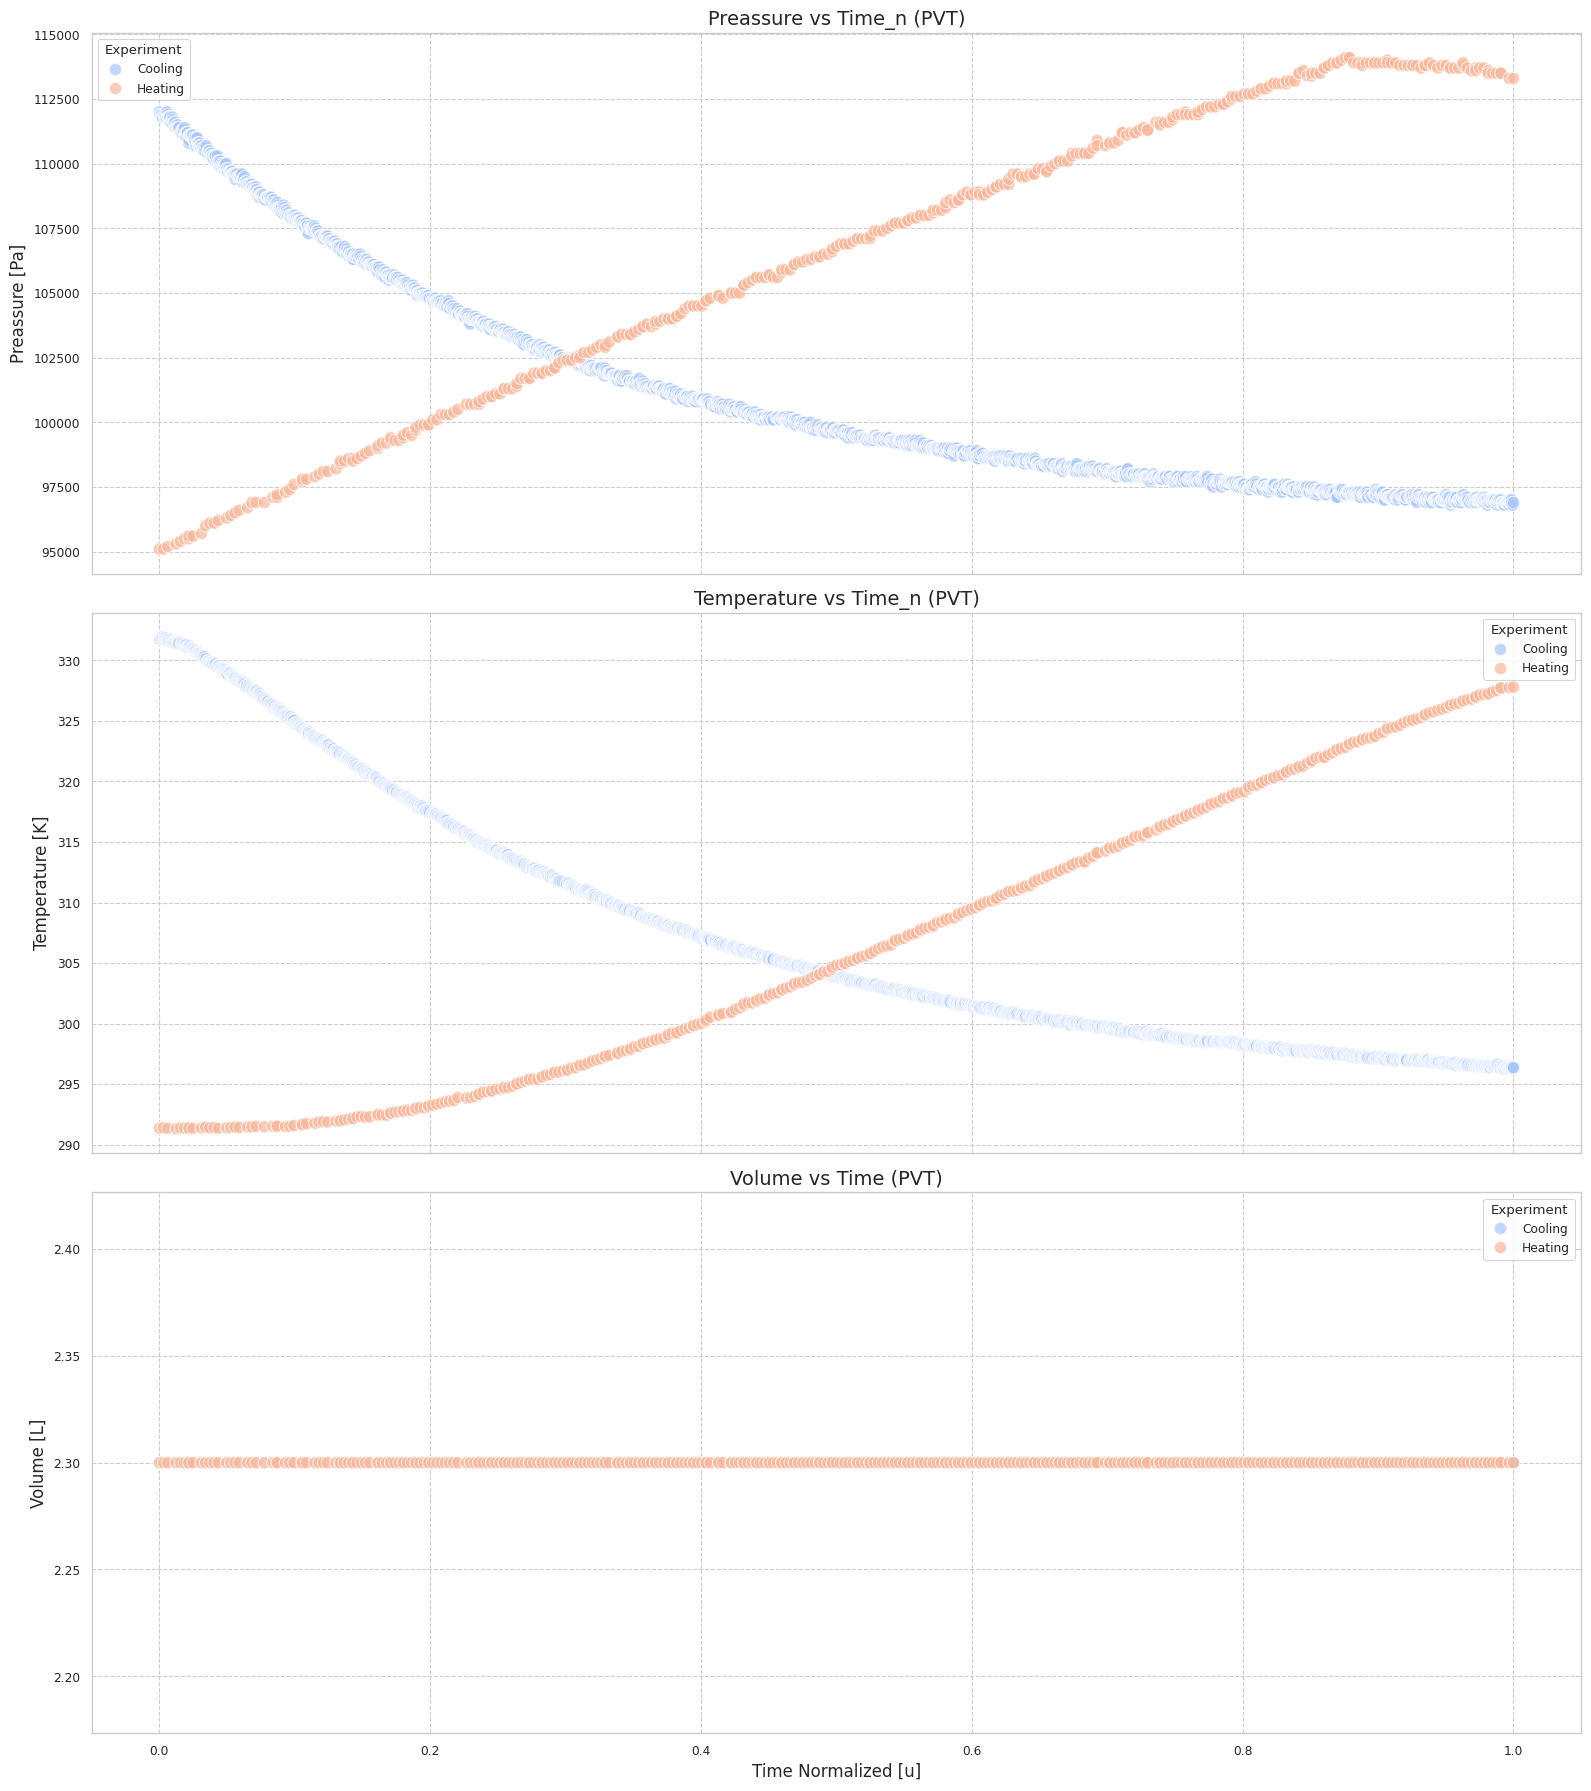

In [164]:
fig, axes = plt.subplots(3, 1, figsize=(16, 18), sharex=True)
sns.set_style("whitegrid")
sns.set_context("paper")

# Pressure vs Time_n
sns.scatterplot(
    x='Time_n',
    y='Preassure',
    data=pd.concat([
        df_pvt_cold.assign(Type='Cooling'),
        df_pvt_hot.assign(Type='Heating')
    ]),
    ax=axes[0],
    hue='Type',
    palette='coolwarm',
    alpha=0.7,
    s=80
)

axes[0].set_ylabel('Preassure [Pa]', fontsize=12)
axes[0].set_title('Preassure vs Time_n (PVT)', fontsize=14)
axes[0].legend(title='Experiment')
axes[0].grid(True, linestyle='--')

# Temperature vs Time_n
sns.scatterplot(
    x='Time_n',
    y='Temperature',
    data=pd.concat([
        df_pvt_cold.assign(Type='Cooling'),
        df_pvt_hot.assign(Type='Heating')
    ]),
    ax=axes[1],
    hue='Type',
    palette='coolwarm',
    alpha=0.7,
    s=80
)
axes[1].set_ylabel('Temperature [K]', fontsize=12)
axes[1].set_title('Temperature vs Time_n (PVT)', fontsize=14)
axes[1].legend(title='Experiment')
axes[1].grid(True, linestyle='--')

# Volume vs Time_n
sns.scatterplot(
    x='Time_n',
    y='Volume',
    data=pd.concat([
        df_pvt_cold.assign(Type='Cooling'),
        df_pvt_hot.assign(Type='Heating')
    ]),
    ax=axes[2],
    hue='Type',
    palette='coolwarm',
    alpha=0.7,
    s=80
)
axes[2].set_xlabel('Time Normalized [u]', fontsize=12)
axes[2].set_ylabel('Volume [L]', fontsize=12)
axes[2].set_title('Volume vs Time (PVT)', fontsize=14)
axes[2].legend(title='Experiment')
axes[2].grid(True, linestyle='--')

plt.tight_layout()
plt.show()


## Comparing the variables

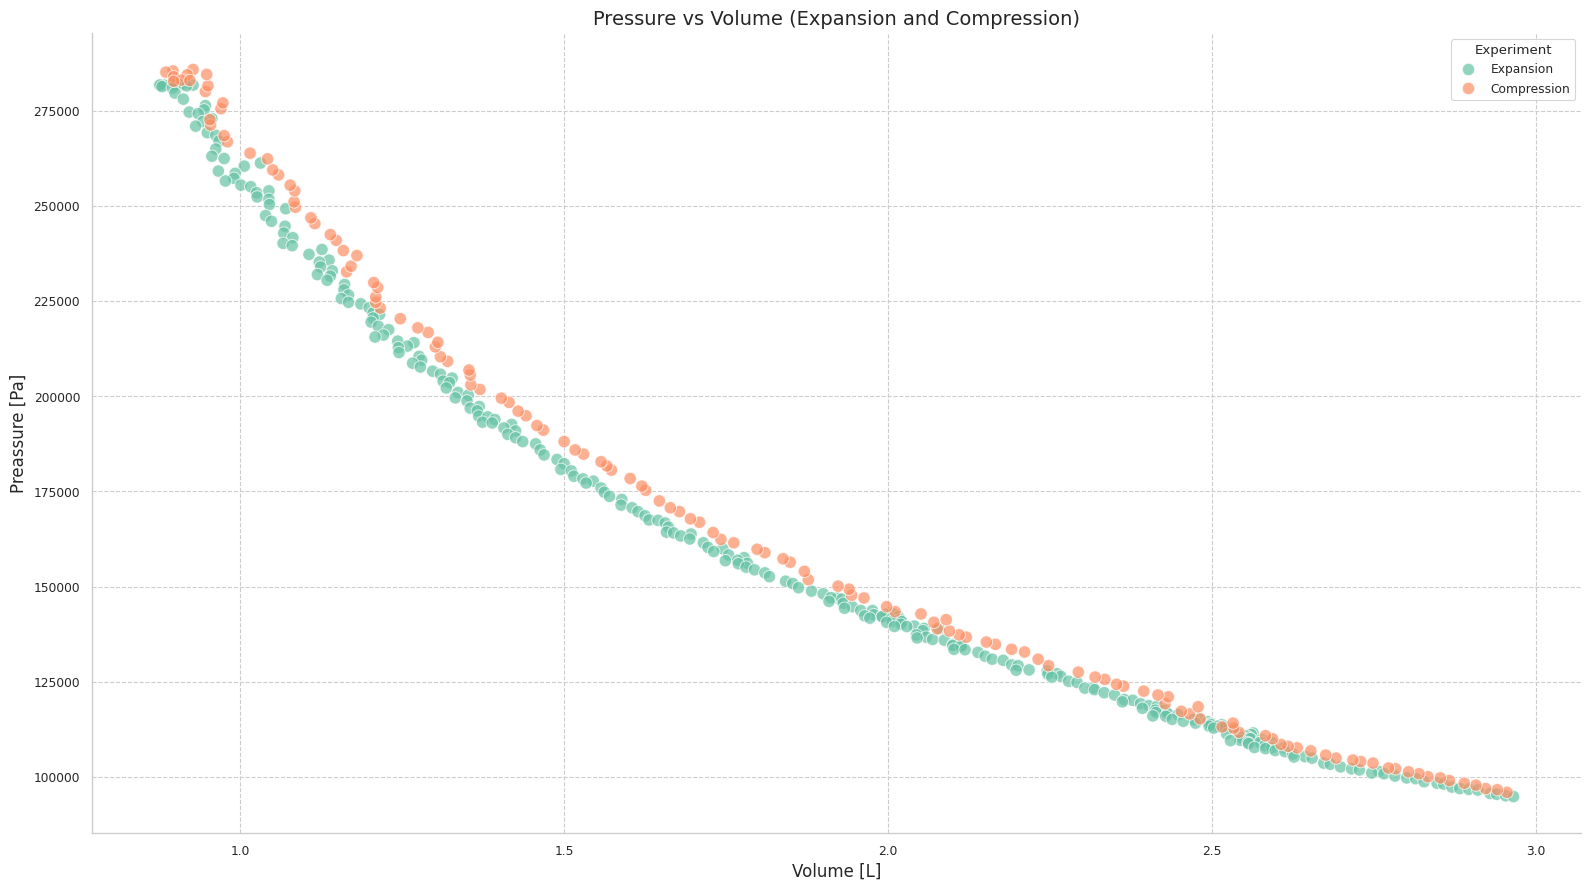

In [165]:
plt.figure(figsize=(16, 9))
sns.scatterplot(
    x='Volume',
    y='Preassure',
    data=pd.concat([
        df_pvv_exp.assign(Type='Expansion'),
        df_pvv_comp.assign(Type='Compression')
    ]),
    hue='Type',
    palette='Set2',
    alpha=0.7,
    s=80
)
plt.xlabel('Volume [L]', fontsize=12)
plt.ylabel('Preassure [Pa]', fontsize=12)
plt.title('Pressure vs Volume (Expansion and Compression)', fontsize=14)
plt.legend(title='Experiment')
sns.despine()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


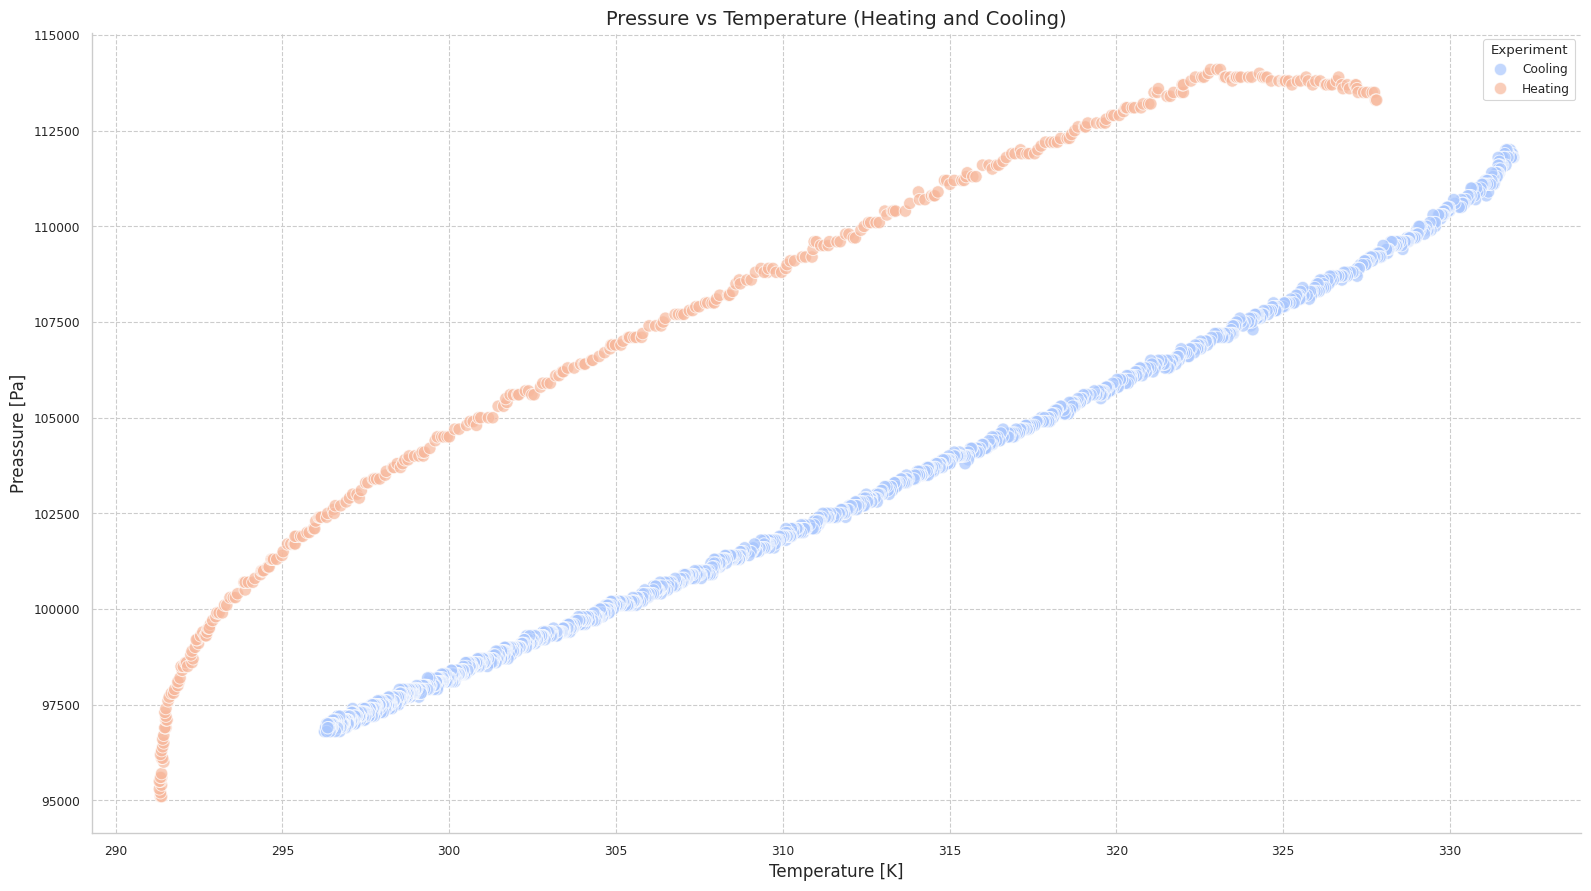

In [166]:

plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")
sns.set_context("paper")
sns.scatterplot(
    x='Temperature',
    y='Preassure',
    data=pd.concat([
        df_pvt_cold.assign(Type='Cooling'),
        df_pvt_hot.assign(Type='Heating')
    ]),
    hue='Type',
    palette='coolwarm',
    alpha=0.7,
    s=80
)
plt.xlabel('Temperature [K]', fontsize=12)
plt.ylabel('Preassure [Pa]', fontsize=12)
plt.title('Pressure vs Temperature (Heating and Cooling)', fontsize=14)
plt.legend(title='Experiment')
sns.despine()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


## Assuming laws

### Without Context

In [167]:
for df in dfs_pvv:
    df['P-V'] = df['Preassure'] * df['Volume']

for df in dfs_pvt:
    df['P_T'] = df['Preassure'] / df['Temperature']

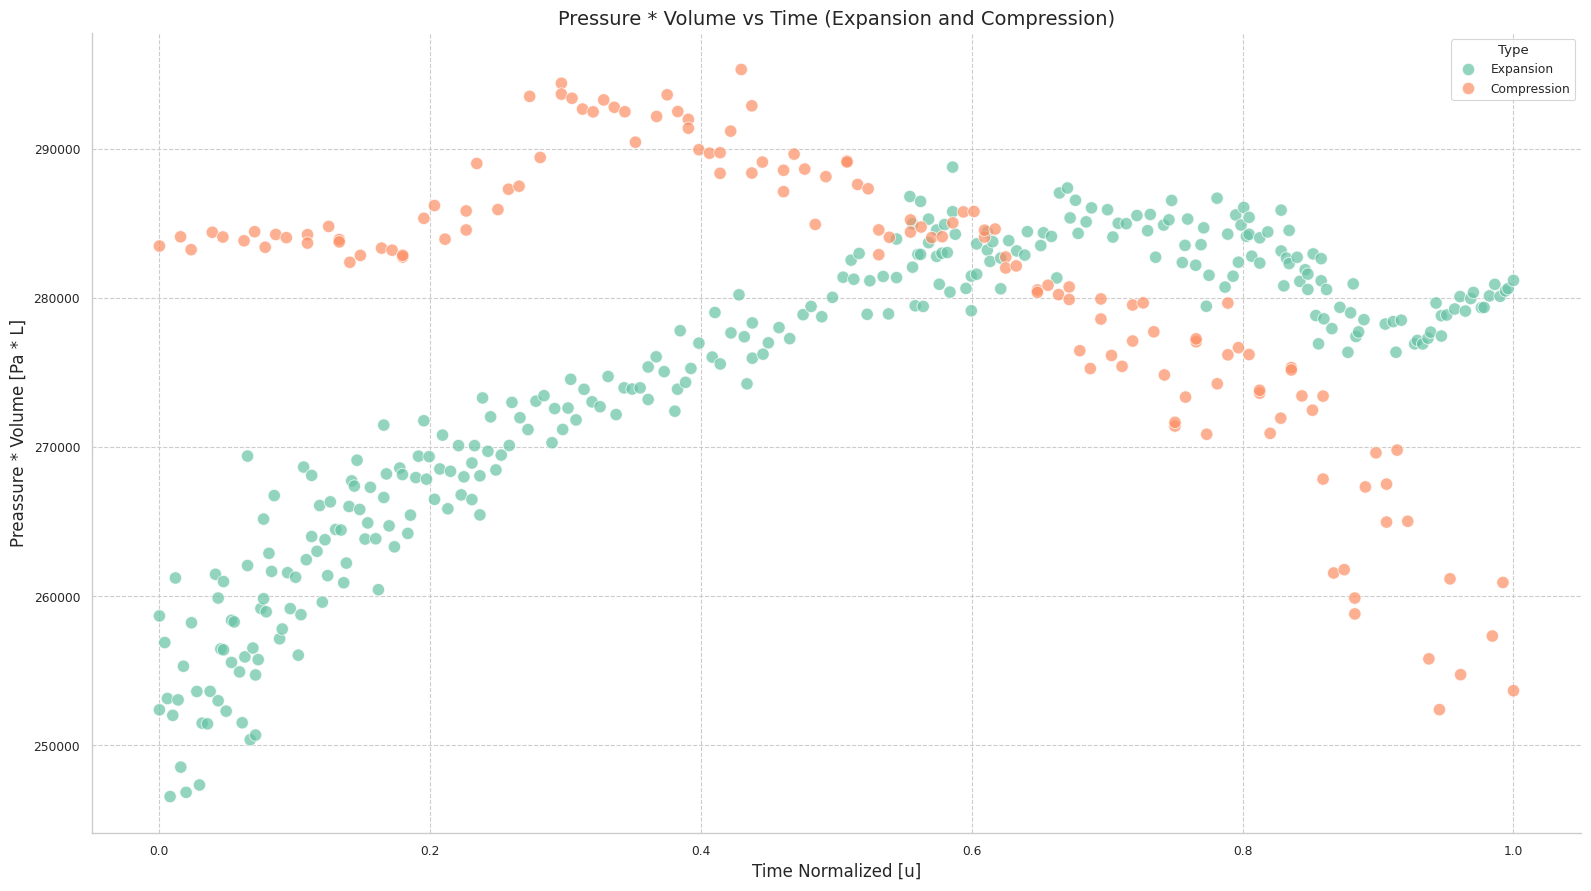

In [168]:
plt.figure(figsize=(16, 9))
sns.scatterplot(
    x='Time_n',
    y='P-V',
    data=pd.concat([
        df_pvv_exp.assign(Type='Expansion'),
        df_pvv_comp.assign(Type='Compression')
    ]),
    hue='Type',
    palette='Set2',
    alpha=0.7,
    s=80
)
plt.xlabel('Time Normalized [u]', fontsize=12)
plt.ylabel('Preassure * Volume [Pa * L]', fontsize=12)
plt.title('Pressure * Volume vs Time (Expansion and Compression)', fontsize=14)
plt.legend(title='Type')
sns.despine()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


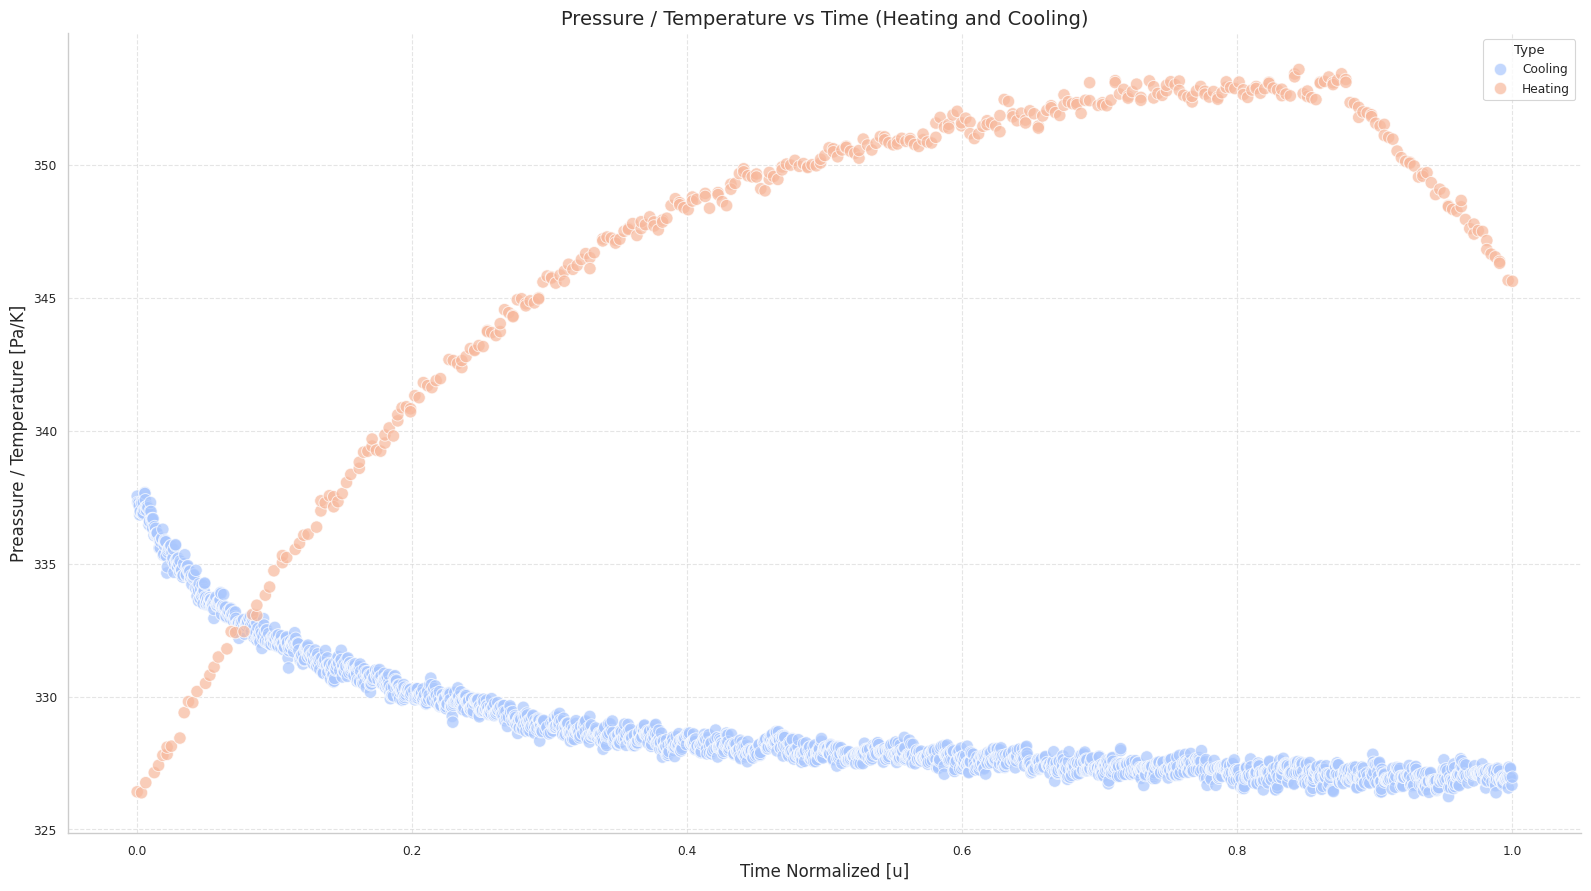

In [169]:
plt.figure(figsize=(16, 9))
sns.scatterplot(
    x='Time_n',
    y='P_T',
    data=pd.concat([
        df_pvt_cold.assign(Type='Cooling'),
        df_pvt_hot.assign(Type='Heating')
    ]),
    hue='Type',
    palette='coolwarm',
    alpha=0.7,
    s=80
)
plt.xlabel('Time Normalized [u]', fontsize=12)
plt.ylabel('Preassure / Temperature [Pa/K]', fontsize=12)
plt.title('Pressure / Temperature vs Time (Heating and Cooling)', fontsize=14)
plt.legend(title='Type')
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### With Context

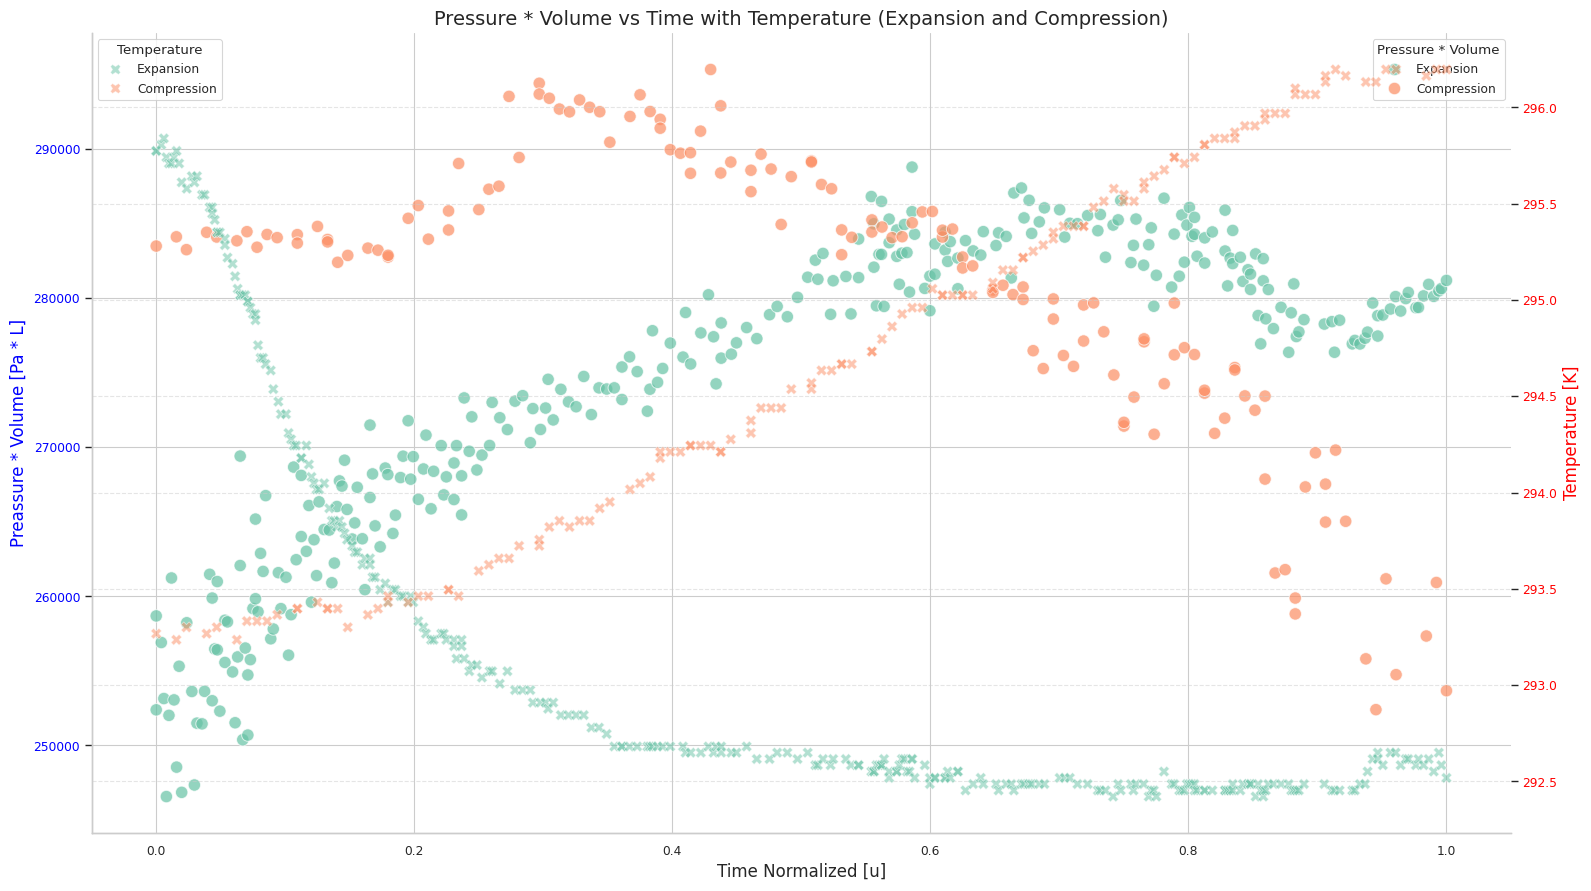

In [170]:
# P*V vs Time with Temperature on secondary axis
fig, ax1 = plt.subplots(figsize=(16, 9))

# Primary axis: P*V vs Time
sns.scatterplot(
    x='Time_n',
    y='P-V',
    data=pd.concat([
        df_pvv_exp.assign(Type='Expansion'),
        df_pvv_comp.assign(Type='Compression')
    ]),
    hue='Type',
    palette='Set2',
    alpha=0.7,
    s=80,
    ax=ax1
)
ax1.set_xlabel('Time Normalized [u]', fontsize=12)
ax1.set_ylabel('Preassure * Volume [Pa * L]', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.get_legend().set_title(f"Pressure * Volume")


# Secondary axis: Temperature vs Time
ax2 = ax1.twinx()
sns.scatterplot(
    x='Time_n',
    y='Temperature',
    data=pd.concat([
        df_pvv_exp.assign(Type='Expansion'),
        df_pvv_comp.assign(Type='Compression')
    ]),
    hue='Type',
    palette='Set2',
    alpha=0.5,
    s=60,
    ax=ax2,
    marker='X'
)
ax2.set_ylabel('Temperature [K]', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.get_legend().set_title("Temperature")

plt.title('Pressure * Volume vs Time with Temperature (Expansion and Compression)', fontsize=14)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


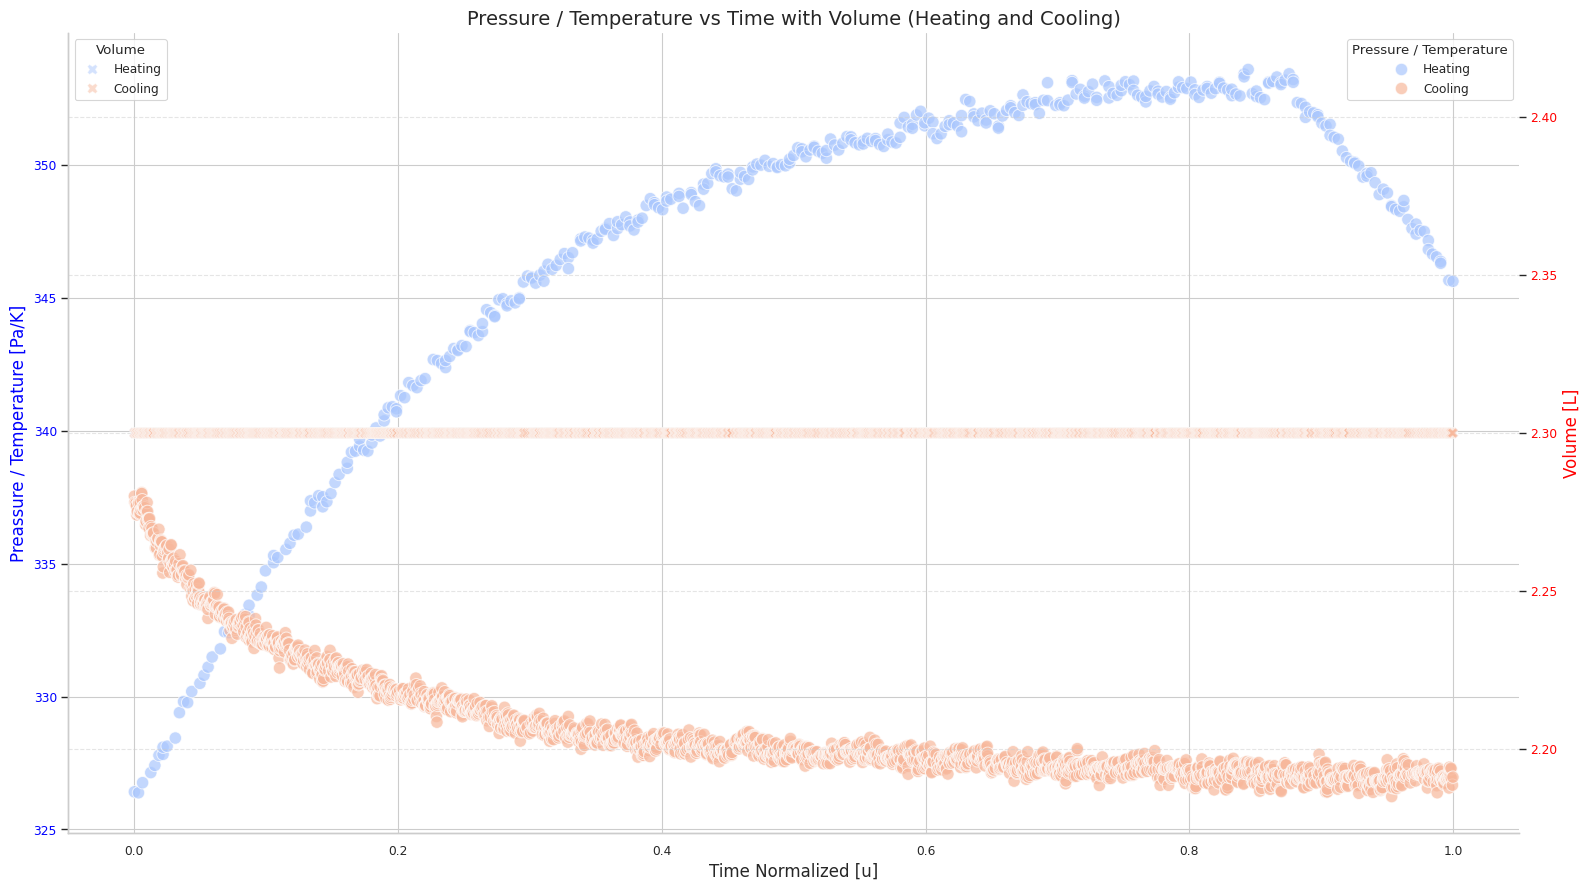

In [171]:
## Dual-axis graphs

# P/T vs Time with Volume on secondary axis
fig, ax1 = plt.subplots(figsize=(16, 9))

# Primary axis: P/T vs Time
sns.scatterplot(
    x='Time_n',
    y='P_T',
    data=pd.concat([
        df_pvt_hot.assign(Type='Heating'),
        df_pvt_cold.assign(Type='Cooling')
    ]),
    hue='Type',
    palette='coolwarm',
    alpha=0.7,
    s=80,
    ax=ax1
)
ax1.set_xlabel('Time Normalized [u]', fontsize=12)
ax1.set_ylabel('Preassure / Temperature [Pa/K]', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.get_legend().set_title(f"Pressure / Temperature")


# Secondary axis: Volume vs Time
ax2 = ax1.twinx()
scatter2 = sns.scatterplot(
    x='Time_n',
    y='Volume',
    data=pd.concat([
        df_pvt_hot.assign(Type='Heating'),
        df_pvt_cold.assign(Type='Cooling')
    ]),
    hue='Type',
    palette='coolwarm',
    alpha=0.5,
    s=60,
    ax=ax2,
    marker='X'
)
ax2.set_ylabel('Volume [L]', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
legend2 = ax2.legend(title='Volume', loc='upper left')

plt.title('Pressure / Temperature vs Time with Volume (Heating and Cooling)', fontsize=14)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Estimating K

### Getting the ammount of matter

Assuming that we have an ideal gas, we can know because of **REFERENCE OF 22,4 L FOR MOL OF GAS** (Avogadro's law) that we have $1 \; [\text{mol}]$ of gas for each $22,4 \; [\text{L}]$ then we may infer that:

1. Experiment 1:

    No Fixed ammount of gas, but we can infer that $n = \frac{V}{22.4}$
2. Experiment 2:

    Fixed ammount of gas of 3 liters thus $3 \; [\text{L}] \Rightarrow  3 \; [\text{L}] * \frac{1 \; [\text{mol}]}{22,4 \; [\text{L}]} \approx 0.1339 \; [\text{mol}]$

And then assuming the laws of Charles ($\frac{V_0}{T_0} = \frac{V_1}{T_1}$ with P, n constants) we infer that

$$ \frac{P*V}{n*T} = C $$

8314.462

In [172]:
for df in dfs_pvv:
    df['Matter'] = df['Volume']/22.4

for df in dfs_pvt:
    df['Matter'] = 0.1339
    
for df in dfs:
    df['R_Constant'] = (df["Preassure"] * df["Volume"]) / (df['Matter'] * df["Temperature"])

### Graphing K

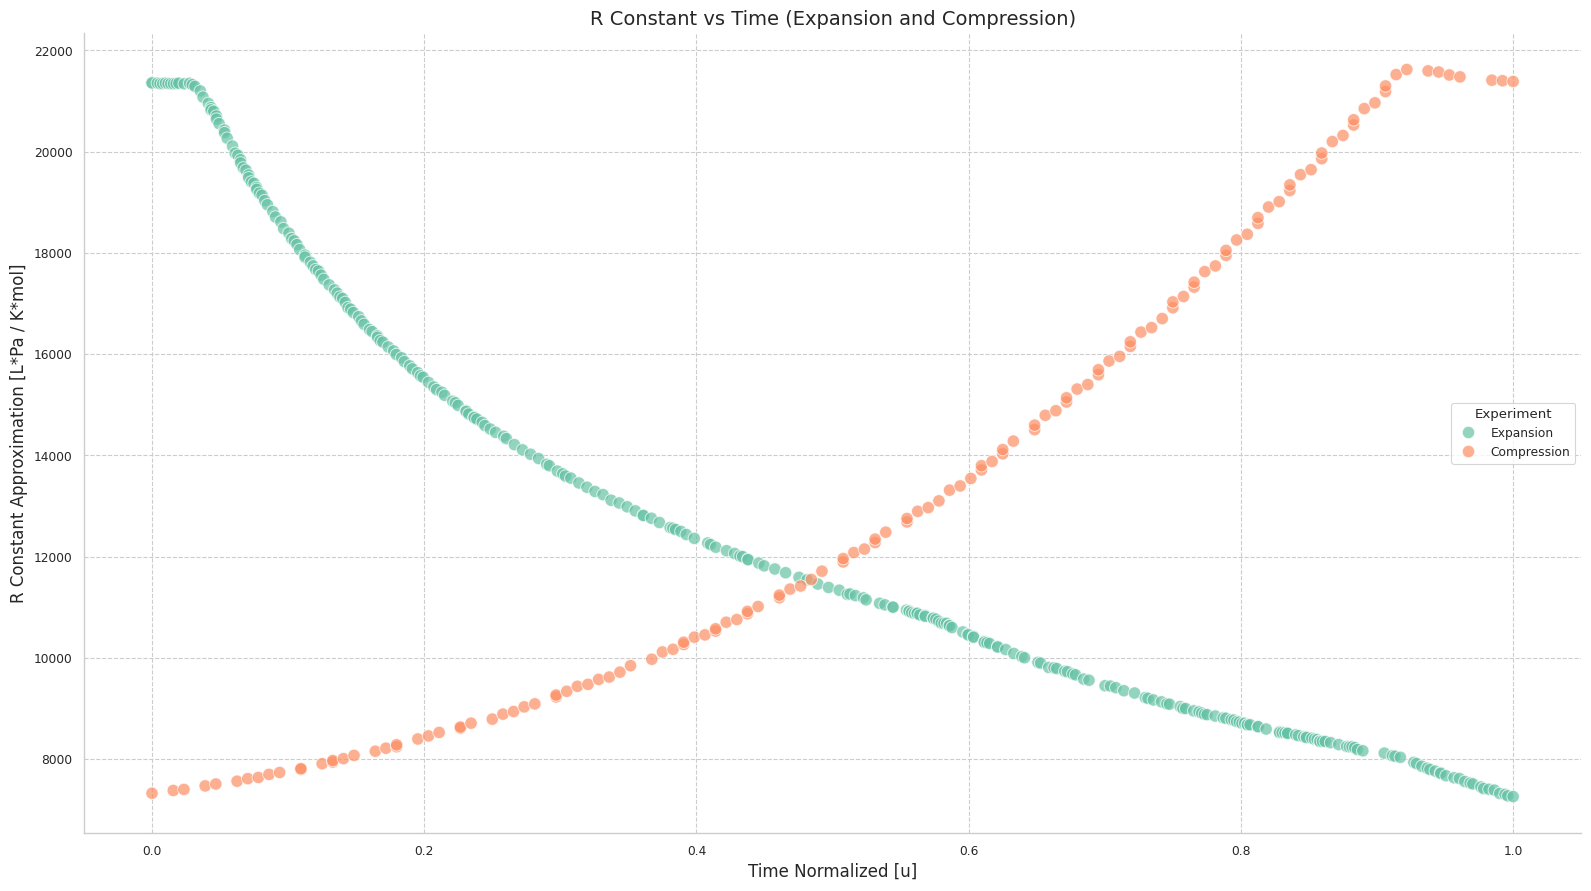

In [173]:
plt.figure(figsize=(16, 9))
sns.scatterplot(
    x='Time_n',
    y='R_Constant',
    data=pd.concat([
        df_pvv_exp.assign(Type='Expansion'),
        df_pvv_comp.assign(Type='Compression')
    ]),
    hue='Type',
    palette='Set2',
    alpha=0.7,
    s=80
)
plt.xlabel('Time Normalized [u]', fontsize=12)
plt.ylabel('R Constant Approximation [L*Pa / K*mol]', fontsize=12)
plt.title('R Constant vs Time (Expansion and Compression)', fontsize=14)
plt.legend(title='Experiment')
sns.despine()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

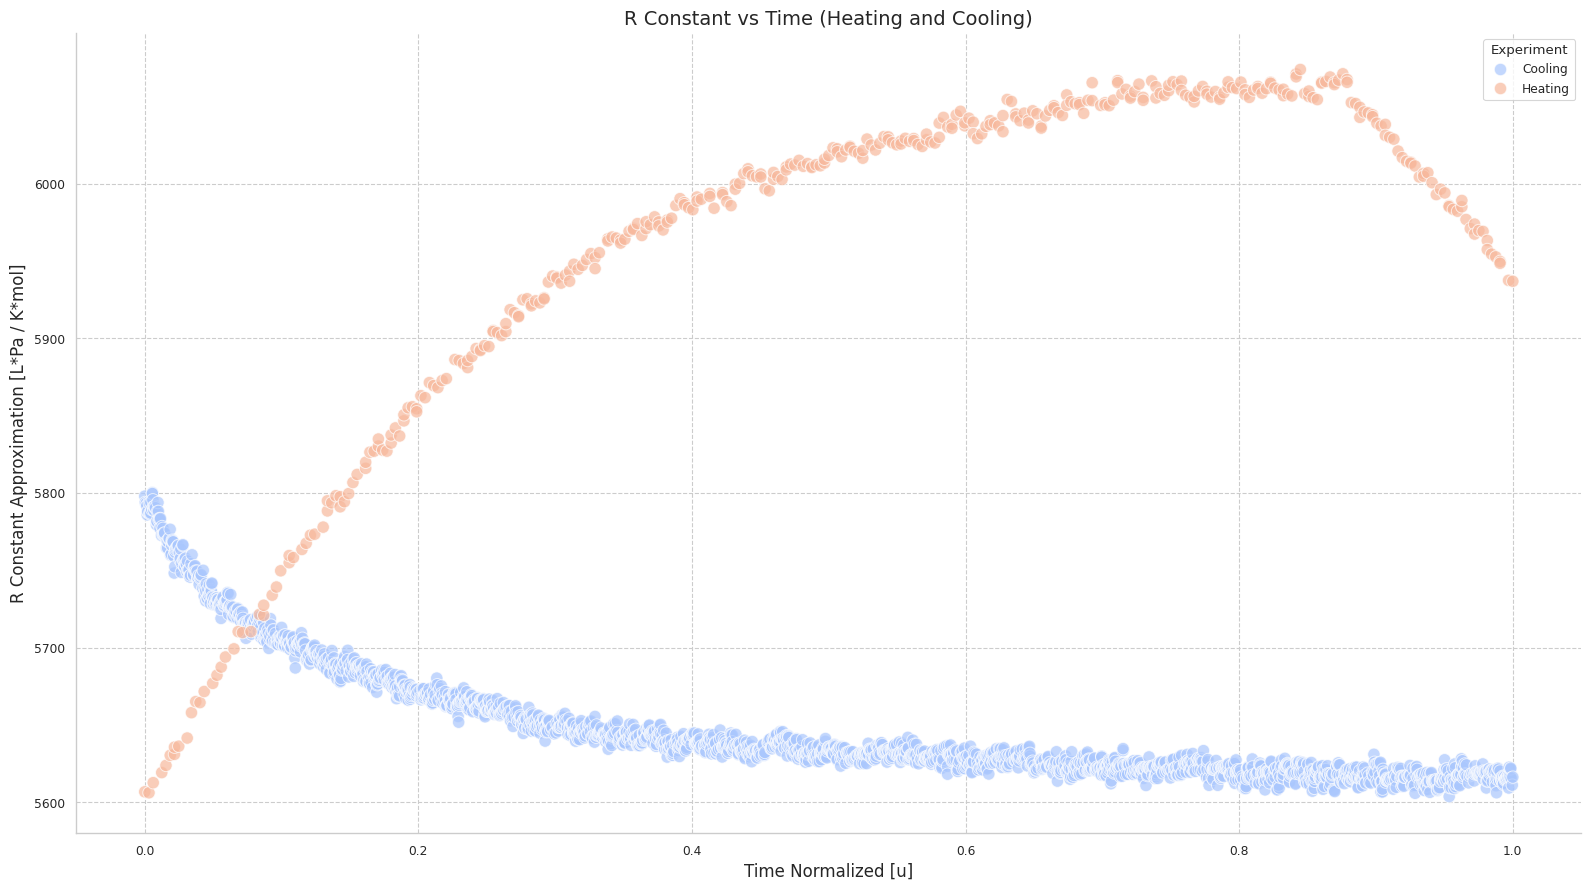

In [174]:
plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")
sns.set_context("paper")
sns.scatterplot(
    x='Time_n',
    y='R_Constant',
    data=pd.concat([
        df_pvt_cold.assign(Type='Cooling'),
        df_pvt_hot.assign(Type='Heating')
    ]),
    hue='Type',
    palette='coolwarm',
    alpha=0.7,
    s=80
)
plt.xlabel('Time Normalized [u]', fontsize=12)
plt.ylabel('R Constant Approximation [L*Pa / K*mol]', fontsize=12)
plt.title('R Constant vs Time (Heating and Cooling)', fontsize=14)
plt.legend(title='Experiment')
sns.despine()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


## Graphing K with real K

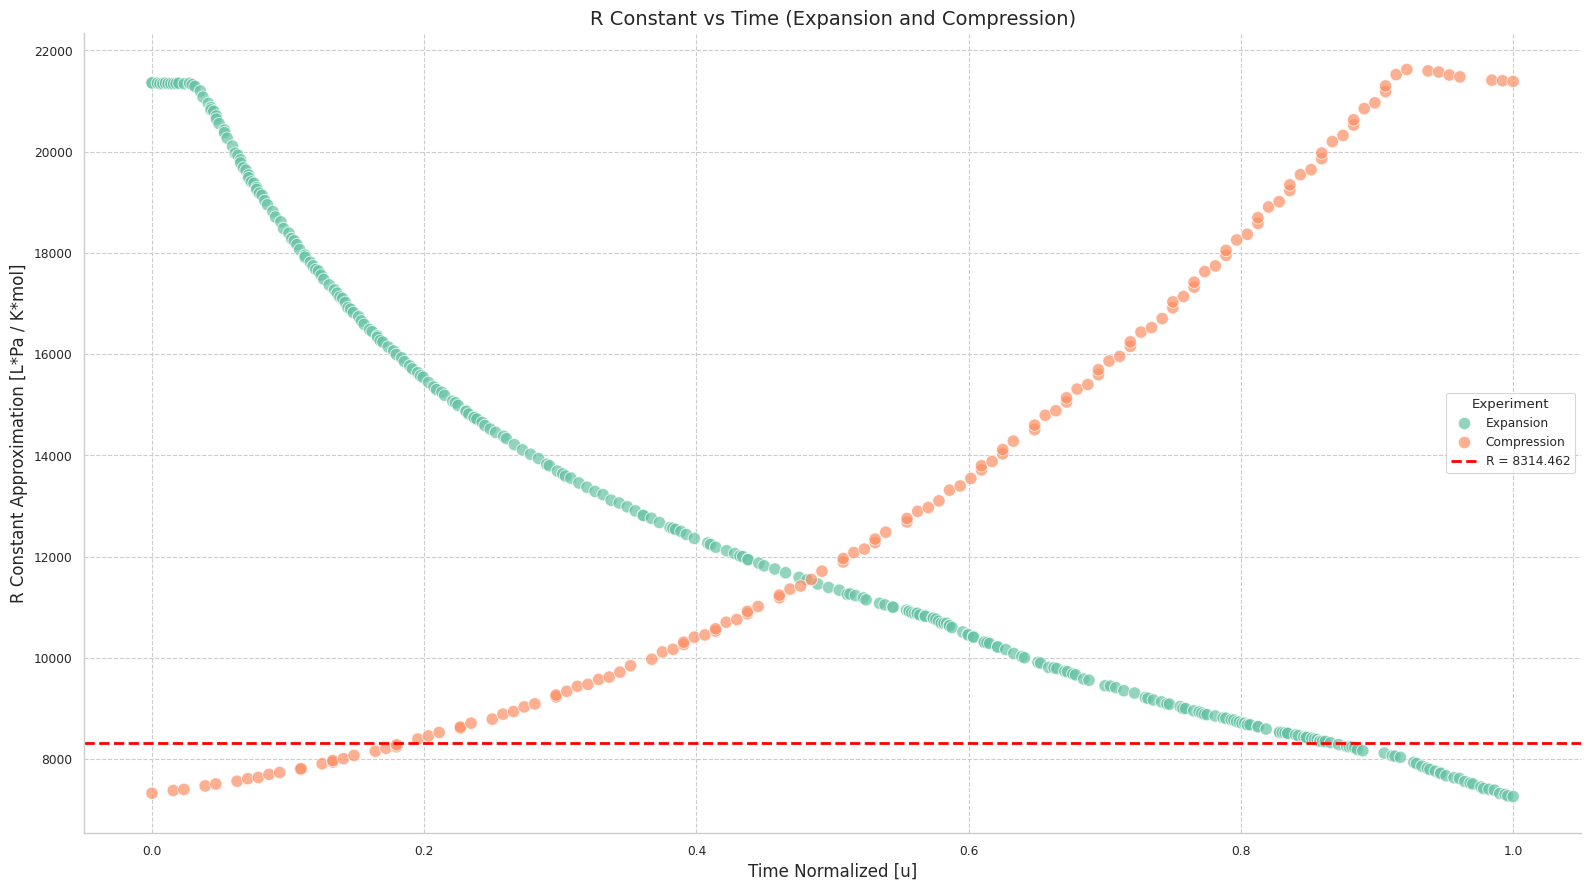

In [177]:
plt.figure(figsize=(16, 9))
sns.scatterplot(
    x='Time_n',
    y='R_Constant',
    data=pd.concat([
        df_pvv_exp.assign(Type='Expansion'),
        df_pvv_comp.assign(Type='Compression')
    ]),
    hue='Type',
    palette='Set2',
    alpha=0.7,
    s=80
)
plt.axhline(y=8314.462, color='red', linestyle='--', linewidth=2, label='R = 8314.462')
plt.xlabel('Time Normalized [u]', fontsize=12)
plt.ylabel('R Constant Approximation [L*Pa / K*mol]', fontsize=12)
plt.title('R Constant vs Time (Expansion and Compression)', fontsize=14)
plt.legend(title='Experiment')
sns.despine()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")
sns.set_context("paper")
sns.scatterplot(
    x='Time_n',
    y='R_Constant',
    data=pd.concat([
        df_pvt_cold.assign(Type='Cooling'),
        df_pvt_hot.assign(Type='Heating')
    ]),
    hue='Type',
    palette='coolwarm',
    alpha=0.7,
    s=80
)
plt.xlabel('Time Normalized [u]', fontsize=12)
plt.ylabel('R Constant Approximation [L*Pa / K*mol]', fontsize=12)
plt.title('R Constant vs Time (Heating and Cooling)', fontsize=14)
plt.legend(title='Experiment')
sns.despine()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()
